In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm
from datetime import timedelta, datetime

In [139]:
#df = open('HDR Global Mean Sea Level Data.txt',encoding='utf8').read()
header_names = ['Type', 'Index', 'Year', 'nOfObs', 'nOfWObs', 'GMSL1', 'stdGMSL1', 'smGMSL1',
                'GMSL2', 'stdGMSL2', 'smGMSL2', 'smGMSL3']
raw_data = pd.read_csv('HDR Global Mean Sea Level Data.txt', sep = "\n", skiprows = 49)
raw_data.head()

,HDR Header_End---------------------------------------
0,0 11 1993.0115260 466462 337277.00 ...
1,0 12 1993.0386920 460889 334037.31 ...
2,0 13 1993.0658580 472123 342416.09 ...
3,0 14 1993.0930250 421377 306050.59 ...
4,0 15 1993.1201910 459548 331094.09 ...


In [140]:
raw_data.columns = ['Lines']
df = raw_data['Lines'].str.split(n = 12, expand=True)
df.columns = header_names
df = df.astype(float)
df = df.astype({'nOfObs': int})
df.head()

,Type,Index,Year,nOfObs,nOfWObs,GMSL1,stdGMSL1,smGMSL1,GMSL2,stdGMSL2,smGMSL2,smGMSL3
0,0.0,11.0,1993.011526,466462,337277.00,-37.24,92.66,-37.02,-37.24,92.66,-37.02,-37.55
1,0.0,12.0,1993.038692,460889,334037.31,-40.35,95.39,-38.20,-40.34,95.39,-38.19,-38.06
2,0.0,13.0,1993.065858,472123,342416.09,-40.17,92.29,-38.28,-40.16,92.29,-38.27,-37.60
3,0.0,14.0,1993.093025,421377,306050.59,-41.92,96.20,-38.56,-41.89,96.19,-38.54,-37.45
4,0.0,15.0,1993.120191,459548,331094.09,-36.89,94.64,-37.87,-36.85,94.63,-37.83,-36.44


In [141]:
def is_leap(year):
    return year % 4 == 0 and year % 100 != 0 and year % 400 == 0
def convert_partial_year(number):
    year = int(number)
    d = timedelta(days=(number - year)*(365 + is_leap(year)))
    day_one = datetime(year,1,1)
    date = d + day_one
    return date

In [142]:
df['Year'] = df['Year'].apply(convert_partial_year)
df.head()

,Type,Index,Year,nOfObs,nOfWObs,GMSL1,stdGMSL1,smGMSL1,GMSL2,stdGMSL2,smGMSL2,smGMSL3
0,0.0,11.0,1993-01-05 04:58:03.936000,466462,337277.00,-37.24,92.66,-37.02,-37.24,92.66,-37.02,-37.55
1,0.0,12.0,1993-01-15 02:56:30.912003,460889,334037.31,-40.35,95.39,-38.20,-40.34,95.39,-38.19,-38.06
2,0.0,13.0,1993-01-25 00:54:57.887998,472123,342416.09,-40.17,92.29,-38.28,-40.16,92.29,-38.27,-37.60
3,0.0,14.0,1993-02-03 22:53:56.399997,421377,306050.59,-41.92,96.20,-38.56,-41.89,96.19,-38.54,-37.45
4,0.0,15.0,1993-02-13 20:52:23.375999,459548,331094.09,-36.89,94.64,-37.87,-36.85,94.63,-37.83,-36.44


In [212]:
df1 = df[['Year','GMSL1']]
df1 = df1.set_index('Year')
df1

,GMSL1
Year,
1993-01-05 04:58:03.936000,-37.24
1993-01-15 02:56:30.912003,-40.35
1993-01-25 00:54:57.887998,-40.17
1993-02-03 22:53:56.399997,-41.92
1993-02-13 20:52:23.375999,-36.89
1993-02-23 18:50:50.352002,-35.69
1993-03-05 16:49:17.327997,-36.09
1993-03-15 14:47:44.304000,-34.70
1993-03-25 12:46:11.280002,-34.04


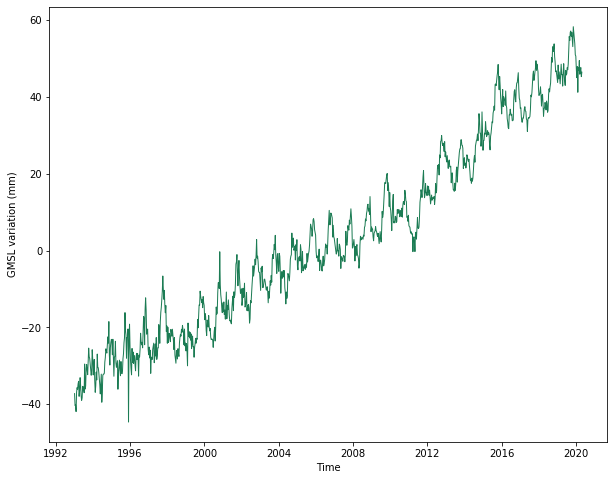

In [214]:
#%matplotlib inline

# Create figure, title and plot data
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('GMSL variation (mm)')
plt.plot(df1, color='#1C7C54', linewidth=1.0)